Logistic Regression Implementation: The goal of this assignment is to give you hands-on experience with logistic regression (binary) and softmax regression (multi-class). Please download
the provided Iris dataset (120 training samples, 30 test samples). Each sample has two features and
a label in {0, 1, 2}, corresponding to: 0: Iris setosa; 1: Iris versicolor; 2: Iris virginica. The files
X train.csv and X test.csv contain the features (two columns), and y train.csv and
y test.csv contain the labels (one column).


1. Logistic Regression for Binary Classification: Train a model to classify setosa vs. nonsetosa samples. First, convert all labels of 1 and 2 into 1 (so 0 remains 0; 1 and 2 become
1). Then train a logistic regression model using LogisticRegression in scikit-learn on the
training set. Report the learnt coefficients. Report classification accuracies on the training
set and on the test set. Plot the training samples (different colors for the two classes) and plot
the decision boundary.

2. Logistic Regression with Softmax for Multi-class Classification: Use the original 3-class
labels {0, 1, 2} and train a logistic regression model with multi class=‘multinomial’
(softmax) on the training set. Report the learnt coefficients. Report classification accuracies
on the training set and on the test set. Plot the training samples (three distinct colors for the
three classes) and plot the decision boundaries (you will have three boundaries, one for each
pair of classes).


In [1]:
import pandas as pd

In [9]:
x_train = pd.read_csv("X_train.csv", header=None)
x_test = pd.read_csv("X_test.csv", header=None)
y_train = pd.read_csv("y_train.csv", header=None)
y_test = pd.read_csv("y_test.csv", header=None)

In [4]:
# Each sample has two features and a label in {0, 1, 2}, corresponding to: 
# 0: Iris setosa; 1: Iris versicolor; 2: Iris virginica. 
# The files X train.csv and X test.csv contain the features (two columns)
# y train.csv and y test.csv contain the labels (one column)

In [10]:
print(x_train)

            0         1
0    2.705256 -1.031238
1    3.233198 -1.586253
2   -0.249094 -4.742310
3    2.126066 -1.602704
4    2.111766 -1.316971
..        ...       ...
115 -0.270544 -4.321936
116  0.272897 -4.955746
117  2.357262 -1.221726
118 -0.378993 -4.282538
119 -0.821135 -6.446755

[120 rows x 2 columns]


In [14]:
# 1. Logisitic regression with Binary Classification:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Train a logistic regression model on the training data
model = LogisticRegression()
model.fit(x_train, y_train.values.ravel())
# Make predictions on the test data
y_pred = model.predict(x_test)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 1.00


C:\Users\koola\AppData\Local\Temp\ipykernel_31104\1779306627.py:17: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x_test[0], x_test[1], c=y_pred, edgecolors='k', marker='x')


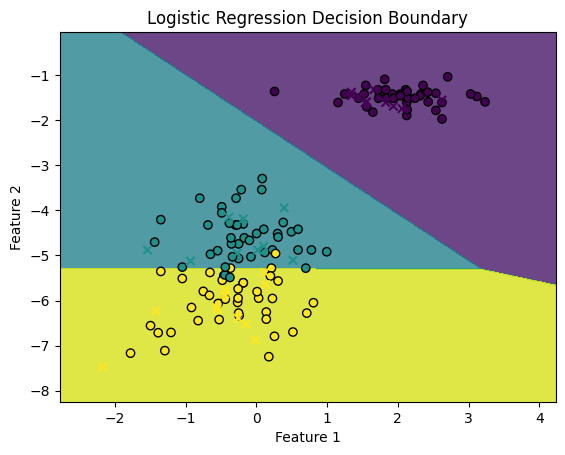

In [15]:
# plot the decision boundary
import matplotlib.pyplot as plt
import numpy as np
# Create a mesh grid for plotting decision boundary
x_min, x_max = x_train[0].min() - 1, x_train[0].max() + 1
y_min, y_max = x_train[1].min() - 1, x_train[1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))
# Predict the class for each point in the mesh grid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.8)
# Plot the training points
plt.scatter(x_train[0], x_train[1], c=y_train.values.ravel(), edgecolors='k', marker='o')
# Plot the test points
plt.scatter(x_test[0], x_test[1], c=y_pred, edgecolors='k', marker='x')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Logistic Regression Decision Boundary')
plt.show()
